In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Memotion3/"

In [ ]:
from sklearn.datasets import load_files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import torch
from torchvision import models, transforms
from PIL import Image
import numpy as np


In [ ]:
train_data = pd.read_csv(path+'train.csv')

In [ ]:
train_data

,Unnamed: 0,image_url,humour,sarcastic,offensive,motivational,overall,ocr
0,0,https://encrypted-tbn0.gstatic.com/images?q=tb...,very_funny,twisted_meaning,not_offensive,not_motivational,neutral,Relationship status.\nSingle\nMarried\nIt's co...
1,1,https://encrypted-tbn0.gstatic.com/images?q=tb...,very_funny,twisted_meaning,slight,not_motivational,neutral,Bernie or REAGAN?\nBe informed. Compare them o...
2,2,https://encrypted-tbn0.gstatic.com/images?q=tb...,funny,general,not_offensive,not_motivational,positive,I HEAR SOMETHING\nBetter run a mile\nOMG RAJ?\...
3,3,https://preview.redd.it/iwcz3o2niix61.jpg?widt...,very_funny,twisted_meaning,not_offensive,not_motivational,positive,Redditors Visiting IG memepages\n*dies from cr...
4,4,https://encrypted-tbn0.gstatic.com/images?q=tb...,not_funny,not_sarcastic,very_offensive,not_motivational,negative,"Samajh nahi aaya Par sun ke acabo,\nBUDGET SPE..."
...,...,...,...,...,...,...,...,...
6995,6995,https://preview.redd.it/3c7iiijlg9d61.jpg?widt...,hilarious,general,slight,not_motivational,negative,$14 y/o nibbi*\n*16 y/o nibba*\n*20 y/o single...
6996,6996,https://encrypted-tbn0.gstatic.com/images?q=tb...,funny,very_twisted,hateful_offensive,not_motivational,negative,I DON'T HAVE A PROBLEM WITH\nIMMIGRATION\nIF W...
6997,6997,https://encrypted-tbn0.gstatic.com/images?q=tb...,hilarious,not_sarcastic,not_offensive,not_motivational,positive,"Como umbalin\nHey Alia,\nWhat is the\nOpposite..."
6998,6998,https://encrypted-tbn0.gstatic.com/images?q=tb...,hilarious,general,very_offensive,motivational,negative,baby kya kr rhe ho?\ntumhara favorite football...


In [ ]:
missing_counts = train_data.isnull().sum()
missing_counts

,0
Unnamed: 0,0
image_url,0
humour,0
sarcastic,0
offensive,0
motivational,0
overall,0
ocr,0


In [ ]:
train_data.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
train_data.columns

Index(['id', 'image_url', 'humour', 'sarcastic', 'offensive', 'motivational',
       'overall', 'ocr'],
      dtype='object')

## Code to check if the image index and its respective ocr text is aligned and not being invalid.

In [ ]:
import os
from PIL import Image

image_folder = '/content/drive/MyDrive/Memotion3/trainImages'

# Example row access
for idx, row in train_data.iterrows():
    image_name = f"{row['id']}.jpg"
    #image_name = row['id']  # e.g., 'meme_0001.jpg'
    image_path = os.path.join(image_folder, str(image_name))
    #image_path = os.path.join(image_folder, image_name)

    # Check if image file exists
    if not os.path.exists(image_path):
        print(f" Missing: {image_path}")
    else:
        # Load image (if needed)
        img = Image.open(image_path)

        # Optional: Check OCR and filename
        print(f" Image: {image_name} | OCR: {row['ocr'][:50]}...")


 Image: 0.jpg | OCR: Relationship status.
Single
Married
It's complicat...
 Image: 1.jpg | OCR: Bernie or REAGAN?
Be informed. Compare them on the...
 Image: 2.jpg | OCR: I HEAR SOMETHING
Better run a mile
OMG RAJ?
I got ...
 Image: 3.jpg | OCR: Redditors Visiting IG memepages
*dies from cringe*...
 Image: 4.jpg | OCR: Samajh nahi aaya Par sun ke acabo,
BUDGET SPEECH K...
 Image: 5.jpg | OCR: Apun hi bhagwaan hai...
 Image: 6.jpg | OCR: Everyone: *angry about youtube updates
Me as an in...
 Image: 7.jpg | OCR: IMMIGRANTS!!
BURN EM ALL AND THERE
GAU
BOATS
memeg...
 Image: 8.jpg | OCR: My Teacher - While
checking my answer
sheet
Me*
Te...
 Image: 9.jpg | OCR: ✓
Tweet
Not an IlTian
@Not_an_IITian
@ShaadiDotCom...
 Image: 10.jpg | OCR: urganabedanaxtpras
STATES
Kamala Harris
@KamalaHar...
 Image: 11.jpg | OCR: vany
IMPERIAL COLLEGE
94
THOUG
10110
Lockdown kab ...
 Image: 12.jpg | OCR: If you hate America
to much
then you can just
leav...
 Image: 13.jpg | OCR: Nupur J Sharma
@UnSubtleDesi
R

KeyboardInterrupt: 

In [ ]:
import pandas as pd

# IMPORTANT: Make sure your 'path' variable is correctly defined
path = "/content/drive/MyDrive/Memotion3/" # Adjust this path as needed

# Reload val.csv with tab as the separator
val_data = pd.read_csv(path + 'val.csv', sep='\t', on_bad_lines='skip')

# Drop 'Unnamed: 0' if it exists (though less likely with tab sep)
#if 'Unnamed: 0' in val_data.columns:
val_data = val_data.rename(columns={'Unnamed: 0': 'id'})

# Print the columns again to verify they are loaded correctly
print("New columns in val_data after reloading:")
val_data.columns

New columns in val_data after reloading:


Index(['id', 'image_url', 'humour', 'sarcastic', 'offensive', 'motivational',
       'overall', 'ocr'],
      dtype='object')

## Checking the validation images with the respective ocr text if valid

In [ ]:
import os
from PIL import Image

image_folder = '/content/drive/MyDrive/Memotion3/valImages'

# Example row access
for idx, row in val_data.iterrows():
    image_name = f"{row['id']}.jpg"
    #image_name = row['id']  # e.g., 'meme_0001.jpg'
    image_path = os.path.join(image_folder, str(image_name))
    #image_path = os.path.join(image_folder, image_name)

    # Check if image file exists
    if not os.path.exists(image_path):
        print(f" Missing: {image_path}")
    else:
        # Load image (if needed)
        img = Image.open(image_path)

        # Optional: Check OCR and filename
        print(f" Image: {image_name} | OCR: {row['ocr'][:50]}...")


 Image: 0.jpg | OCR: RVCJ
www.EVCI.COM
Tum paas aaye yun muskuraye
BETA...
 Image: 1.jpg | OCR: rukjao Maqbeol,
babuji ko tum nalt muaracay-
hum m...
 Image: 2.jpg | OCR: champak appreciating Jetha
for following lockdown
...
 Image: 3.jpg | OCR: Noor Malik@ItsNoor 22h
When you realize k
Na car h...
 Image: 4.jpg | OCR: noop
αποταθεωρία
Nehe: ita gis having 5 boyfhends ...
 Image: 5.jpg | OCR: OMINES
Entertainment
Meri kundali mein ek khoon li...
 Image: 6.jpg | OCR: Quick Animal Facts:
Most buffalo do not
actually h...
 Image: 7.jpg | OCR: Me: Starts downloading new game
on console
*One ot...
 Image: 8.jpg | OCR: Sir Yuzvendra (parody)
@SirYuzvendra
The audience ...
 Image: 9.jpg | OCR: the w
@sid262662
Family watching KBC*
Amitabh Bach...
 Image: 10.jpg | OCR: no one:
the Kardashians:...
 Image: 11.jpg | OCR: I put my opposition
leader in gulag for 4
years an...
 Image: 12.jpg | OCR: I'M NOT AFRAID...
 Image: 13.jpg | OCR: The Indian EXPRESS
MAT JAO CHOD KE HAME
#NoModiNo ...
 Image: 

KeyboardInterrupt: 

In [ ]:
import pandas as pd

# IMPORTANT: Make sure your 'path' variable is correctly defined
path = "/content/drive/MyDrive/Memotion3/" # Adjust this path as needed

# Reload val.csv with tab as the separator
test_data = pd.read_csv(path+'test.csv')
test_data.head()

,Unnamed: 0,image_url,ocr
0,0,https://encrypted-tbn0.gstatic.com/images?q=tb...,#Lockdown4\nmakatteun\nbura lagega but there n...
1,1,https://encrypted-tbn0.gstatic.com/images?q=tb...,पोस्ट करने वाले\n@alayarwt\nCOBAROK\nHUME KOI ...
2,2,https://encrypted-tbn0.gstatic.com/images?q=tb...,Girlfriend\nFacebook\nMe\nPubg\nMemes\nInsta\n...
3,3,https://encrypted-tbn0.gstatic.com/images?q=tb...,TELL THEM THEY CAN OPEN P\nMERS ARENALDEN\nE\n...
4,4,https://encrypted-tbn0.gstatic.com/images?q=tb...,What about my Media attention\npapa?\nAa gaye ...


In [ ]:
test_data.rename(columns={"Unnamed: 0": "id"}, inplace=True)
test_data.columns

Index(['id', 'image_url', 'ocr'], dtype='object')

## Lading ResNet50 model for image feature extraction.

In [ ]:
from torchvision import models, transforms
from PIL import Image
import numpy as np

resnet = models.resnet50(pretrained=True)
resnet = torch.nn.Sequential(*list(resnet.children())[:-1])  # Remove classifier layer
resnet.eval()

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Standard ImageNet mean
                         std=[0.229, 0.224, 0.225])   # Standard ImageNet std
])

def extract_image_features(image_path):
    try:
        image = Image.open(image_path).convert("RGB")
        image = transform(image).unsqueeze(0)
        with torch.no_grad():
            features = resnet(image).squeeze().numpy()
        return features  # shape: [2048]
    except:
        return np.zeros(2048)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 140MB/s]


In [ ]:
import os

train_image_root = "/content/drive/MyDrive/Memotion3/trainImages"
available_files = os.listdir(train_image_root)

# Optional: Filter only .jpg or .png files
train_image_filenames = [f for f in available_files if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
print("Total images found:", len(train_image_filenames))


Total images found: 7000


In [ ]:
train_image_paths = [os.path.join(train_image_root, fname) for fname in train_image_filenames]

In [ ]:
valid_paths = [p for p in train_image_paths if os.path.exists(p)]
print(" Valid image paths:", len(valid_paths))
print(" Missing image paths:", len(train_image_paths) - len(valid_paths))


 Valid image paths: 7000
 Missing image paths: 0


In [ ]:
import os

val_image_root = "/content/drive/MyDrive/Memotion3/valImages"
available_files = os.listdir(val_image_root)

# Optional: Filter only .jpg or .png files
val_image_filenames = [f for f in available_files if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
print("Total images found:", len(val_image_filenames))

Total images found: 1500


In [ ]:
val_image_paths = [os.path.join(val_image_root, fname) for fname in val_image_filenames]

In [ ]:
import os

test_image_root = "/content/drive/MyDrive/Memotion3/testImages"
available_files = os.listdir(test_image_root)

# Optional: Filter only .jpg or .png files
test_image_filenames = [f for f in available_files if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
print("Total images found:", len(test_image_filenames))


Total images found: 1500


In [ ]:
test_image_paths = [os.path.join(test_image_root, fname) for fname in test_image_filenames]

## Extract train, test and validation image features

In [ ]:
import numpy as np
from tqdm import tqdm

# Load images and extract features
train_image_features = np.vstack([
    extract_image_features(p) for p in tqdm(train_image_paths)
])
#/content/drive/MyDrive/Memotion3
np.save("/content/drive/MyDrive/Memotion3/ResNETimage/train_image_features.npy", train_image_features)

100%|██████████| 7000/7000 [1:11:49<00:00,  1.62it/s]


NameError: name 'content' is not defined

In [ ]:
import numpy as np
from tqdm import tqdm

# Load images and extract features
val_image_features = np.vstack([
    extract_image_features(p) for p in tqdm(val_image_paths)
])

np.save("/content/drive/MyDrive/Memotion3/ResNETimage/val_image_features.npy", val_image_features)


100%|██████████| 1500/1500 [15:32<00:00,  1.61it/s]


In [ ]:
import numpy as np
from tqdm import tqdm

# Load images and extract features
test_image_features = np.vstack([
    extract_image_features(p) for p in tqdm(test_image_paths)
])

np.save("/content/drive/MyDrive/Memotion3/ResNETimage/test_image_features.npy", test_image_features)


100%|██████████| 1500/1500 [15:51<00:00,  1.58it/s]


In [ ]:
import numpy as np

train_image_features = np.load("/content/drive/MyDrive/Memotion3/ResNETimage/train_image_features.npy")
val_image_features = np.load("/content/drive/MyDrive/Memotion3/ResNETimage/val_image_features.npy")
test_image_features = np.load("/content/drive/MyDrive/Memotion3/ResNETimage/test_image_features.npy")

In [ ]:
!pip install emoji


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 7.4 MB/s eta 0:00:00


## Cleaning OCR text

In [ ]:
import re
import string
import emoji
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
stop_words = ENGLISH_STOP_WORDS

def clean_ocr_text(text):
    if not isinstance(text, str):
        return ""

    # Lowercase
    text = text.lower()

    # Remove emojis
    text = emoji.replace_emoji(text, replace='')

    # Remove URLs and HTML
    text = re.sub(r"http\S+|www\S+|<.*?>", "", text)

    # Normalize elongated words (soooo → soo)
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)

    # Remove punctuation and digits
    text = text.translate(str.maketrans('', '', string.punctuation + string.digits))

    # Tokenize and remove stopwords
    tokens = text.split()
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]

    return ' '.join(tokens)


In [ ]:
# This is the correct resource for word_tokenize

train_data["cleaned_ocr"] = train_data["ocr"].apply(clean_ocr_text)
val_data["cleaned_ocr"]   = val_data["ocr"].apply(clean_ocr_text)
test_data["cleaned_ocr"]  = test_data["ocr"].apply(clean_ocr_text)


### Using TF-IDF on text to convert ocr to numeric features, where max_features=2000 - Limits vocab size, ngram_range=(1, 3)- Captures token patterns, max_df=0.9- Downweights overly common terms, min_df=3 - Ensures meaningful frequency. Then TF-IDF is scaled on StandardScaler and PCA is applied on the scaled text features to reduce dimensionality. Next the img features are also normalised and pca is applied over the image as well to reduce the dimensionality.


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: TF-IDF Extraction
vectorizer = TfidfVectorizer(
    max_features=2000,
    stop_words='english',
    ngram_range=(1, 3),
    max_df=0.9,
    min_df=3,
    sublinear_tf=True
)
X_text_train = vectorizer.fit_transform(train_data["cleaned_ocr"]).toarray()
X_text_val   = vectorizer.transform(val_data["cleaned_ocr"]).toarray()
X_text_test  = vectorizer.transform(test_data["cleaned_ocr"]).toarray()

# Step 2: Scale TF-IDF features
text_scaler = StandardScaler()
X_text_train_scaled = text_scaler.fit_transform(X_text_train)
X_text_val_scaled   = text_scaler.transform(X_text_val)
X_text_test_scaled  = text_scaler.transform(X_text_test)

# Step 3: Apply PCA on scaled text features
text_pca = PCA(n_components=100, random_state=42)  # Tune to 100 or 150
X_text_train_pca = text_pca.fit_transform(X_text_train_scaled)
X_text_val_pca   = text_pca.transform(X_text_val_scaled)
X_text_test_pca  = text_pca.transform(X_text_test_scaled)

# Step 4: Normalize image features
image_scaler = StandardScaler()
train_image_scaled = image_scaler.fit_transform(train_image_features)
val_image_scaled   = image_scaler.transform(val_image_features)
test_image_scaled  = image_scaler.transform(test_image_features)

# Step 5: PCA on image features
image_pca = PCA(n_components=256, random_state=42)
train_image_pca = image_pca.fit_transform(train_image_scaled)
val_image_pca   = image_pca.transform(val_image_scaled)
test_image_pca  = image_pca.transform(test_image_scaled)

# Step 6: Early Fusion
#alpha = 0.6  # Try different alpha values later

#X_train_combined = np.hstack([
#    alpha * X_text_train_pca,
#    (1 - alpha) * train_image_pca
#])
#X_val_combined = np.hstack([
#    alpha * X_text_val_pca,
#    (1 - alpha) * val_image_pca
#])
#X_test_combined = np.hstack([
#    alpha * X_text_test_pca,
#    (1 - alpha) * test_image_pca
#])


In [ ]:
print("X_train_combined shape:", X_train_combined.shape)
print("X_val_combined shape:  ", X_val_combined.shape)
print("X_test_combined shape: ", X_test_combined.shape)


X_train_combined shape: (7000, 356)
X_val_combined shape:   (1500, 356)
X_test_combined shape:  (1500, 356)


In [ ]:
import numpy as np

## Extraction of  hate labels on train and validation data.

In [ ]:
def label_hateful(row):
    return int(
        row['offensive'] in ['slight', 'very_offensive', 'hateful_offensive'] or
        (row['sarcastic'] in ['twisted_meaning', 'very_twisted'] and row['humour'] == 'not_funny')
    )

train_data['label'] = train_data.apply(label_hateful, axis=1)
train_data.head()


,id,image_url,humour,sarcastic,offensive,motivational,overall,ocr,cleaned_ocr,label
0,0,https://encrypted-tbn0.gstatic.com/images?q=tb...,very_funny,twisted_meaning,not_offensive,not_motivational,neutral,Relationship status.\nSingle\nMarried\nIt's co...,relationship status single married complicated...,0
1,1,https://encrypted-tbn0.gstatic.com/images?q=tb...,very_funny,twisted_meaning,slight,not_motivational,neutral,Bernie or REAGAN?\nBe informed. Compare them o...,bernie reagan informed compare issues matter i...,1
2,2,https://encrypted-tbn0.gstatic.com/images?q=tb...,funny,general,not_offensive,not_motivational,positive,I HEAR SOMETHING\nBetter run a mile\nOMG RAJ?\...,hear better run mile omg raj got master plan b...,0
3,3,https://preview.redd.it/iwcz3o2niix61.jpg?widt...,very_funny,twisted_meaning,not_offensive,not_motivational,positive,Redditors Visiting IG memepages\n*dies from cr...,redditors visiting memepages dies cringe mematic,0
4,4,https://encrypted-tbn0.gstatic.com/images?q=tb...,not_funny,not_sarcastic,very_offensive,not_motivational,negative,"Samajh nahi aaya Par sun ke acabo,\nBUDGET SPE...",samajh nahi aaya par sun acabo budget speech k...,1


In [ ]:
val_data['label'] = val_data.apply(label_hateful, axis=1)
val_data.head()

,id,image_url,humour,sarcastic,offensive,motivational,overall,ocr,cleaned_ocr,label
0,0,https://encrypted-tbn0.gstatic.com/images?q=tb...,funny,twisted_meaning,not_offensive,not_motivational,neutral,RVCJ\nwww.EVCI.COM\nTum paas aaye yun muskuray...,rvcj tum paas aaye yun muskuraye beta phir bhi...,0
1,1,https://encrypted-tbn0.gstatic.com/images?q=tb...,very_funny,general,slight,not_motivational,negative,"rukjao Maqbeol,\nbabuji ko tum nalt muaracay-\...",rukjao maqbeol babuji tum nalt muaracay hum ma...,1
2,2,https://encrypted-tbn0.gstatic.com/images?q=tb...,funny,general,slight,not_motivational,very_negative,champak appreciating Jetha\nfor following lock...,champak appreciating jetha following lockdown ...,1
3,3,https://encrypted-tbn0.gstatic.com/images?q=tb...,funny,general,slight,not_motivational,negative,Noor Malik@ItsNoor 22h\nWhen you realize k\nNa...,noor malikitsnoor realize car hai dost pawri,1
4,4,https://encrypted-tbn0.gstatic.com/images?q=tb...,very_funny,general,slight,not_motivational,neutral,noop\nαποταθεωρία\nNehe: ita gis having 5 boyf...,noop αποταθεωρία nehe ita gis having boyfhends...,1


In [ ]:
print(train_data['label'].value_counts())

label
0    4183
1    2817
Name: count, dtype: int64


In [ ]:
print(val_data['label'].value_counts())

label
1    863
0    637
Name: count, dtype: int64


In [ ]:
print(train_data.columns)

Index(['id', 'image_url', 'humour', 'sarcastic', 'offensive', 'motivational',
       'overall', 'ocr', 'cleaned_ocr', 'label'],
      dtype='object')


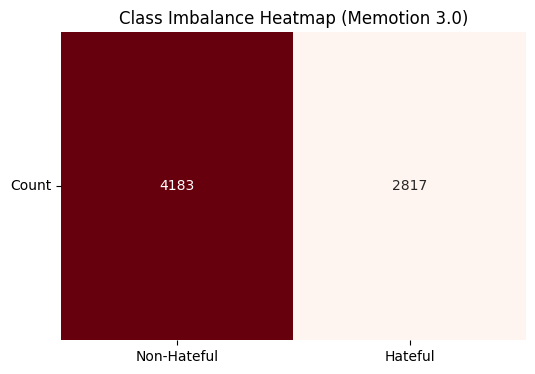

In [ ]:
#Heatmap of tran.csv
# Count of each label
label_counts = train_data['label'].value_counts().sort_index()

# Create a dataframe for seaborn
label_df = pd.DataFrame(label_counts).reset_index()
label_df.columns = ['Label', 'Count']
label_df['Label'] = label_df['Label'].map({0: 'Non-Hateful', 1: 'Hateful'})

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(label_df[['Count']].T, annot=label_df['Count'].values.reshape(1, -1),
            fmt='d', cmap="Reds", cbar=False, xticklabels=label_df['Label'].values)

plt.title('Class Imbalance Heatmap (Memotion 3.0)')
plt.yticks(rotation=0)
plt.show()


## Train data

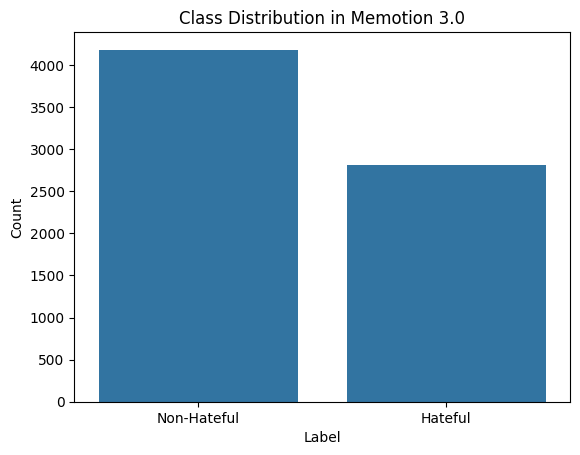

In [ ]:
sns.countplot(data=train_data, x='label')
plt.xticks([0, 1], ['Non-Hateful', 'Hateful'])
plt.title('Class Distribution in Memotion 3.0')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


## Train data evaluation and metrics on LR, SVM

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

#alpha = 0.5
alpha = 0.55
X_train_combined = np.hstack([
    alpha * X_text_train_pca,
    (1 - alpha) * train_image_pca
])
X_val_combined = np.hstack([
    alpha * X_text_val_pca,
    (1 - alpha) * val_image_pca
])

param_grid = {
    'C': [0.1, 0.5, 1, 5],
    'penalty': ['l1', 'l2'],                 # Try both L1 and L2
    'solver': ['liblinear'],                # 'liblinear' supports both l1 and l2
    'class_weight': ['balanced']
}

model = LogisticRegression(max_iter=1000)  # You can increase this if convergence warning appears

# StratifiedKFold maintains label distribution
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold,
                           scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train_combined, train_data['label'])

print("Best ROC-AUC:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best ROC-AUC: 0.6245631811117108
Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

#Best hyperparameters: {'C': 5, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
# 1. Rebuild combined validation features using best alpha
best_alpha = 0.55
X_val_combined = np.hstack([
    best_alpha * X_text_val_pca,
    (1 - best_alpha) * val_image_pca
])

# 2. Rebuild combined training features (use PCA text if used above)
X_train_combined = np.hstack([
    best_alpha * X_text_train_pca,
    (1 - best_alpha) * train_image_pca
])

# 3. Re-train the Logistic Regression model on full training set using best params
final_model = LogisticRegression(
    C=best_params['C'],
    penalty=best_params['penalty'],
    solver=best_params['solver'],
    class_weight=best_params['class_weight'],
    max_iter=1000
)
final_model.fit(X_train_combined, train_data['label'])

# 4. Predict on validation set
val_preds = final_model.predict(X_val_combined)
val_probs = final_model.predict_proba(X_val_combined)[:, 1]

# 5. Evaluate
print("Validation Accuracy:", accuracy_score(val_data['label'], val_preds))
print("Validation ROC-AUC:", roc_auc_score(val_data['label'], val_probs))
print("\nClassification Report:")
print(classification_report(val_data['label'], val_preds))


Validation Accuracy: 0.5053333333333333
Validation ROC-AUC: 0.5367334205274944

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.61      0.51       637
           1       0.60      0.43      0.50       863

    accuracy                           0.51      1500
   macro avg       0.52      0.52      0.51      1500
weighted avg       0.53      0.51      0.50      1500



In [ ]:
train_data['label']

,label
0,0
1,1
2,0
3,0
4,1
...,...
6995,1
6996,1
6997,0
6998,1


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC, LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score, accuracy_score
import joblib

# Combine fused features
X_val_combined = np.hstack([
    alpha * X_text_val_pca,
    (1 - alpha) * val_image_pca
])

X_train_combined = np.hstack([
    alpha * X_text_train_pca,
    (1 - alpha) * train_image_pca
])



base_svc = LinearSVC(C=1.0, class_weight='balanced', max_iter=10000)
calibrated_svc = CalibratedClassifierCV(estimator=base_svc, cv=5)
calibrated_svc.fit(X_train_combined, train_data['label'])

# Predictions and probabilities on training data
train_preds = calibrated_svc.predict(X_train_combined)
train_probs = calibrated_svc.predict_proba(X_train_combined)[:, 1]

# Metrics
train_auc = roc_auc_score(train_data['label'], train_probs)
train_acc = accuracy_score(train_data['label'], train_preds)

print(f"📊 Calibrated LinearSVC (Train) ROC-AUC: {train_auc:.4f}")
print(f"📊 Calibrated LinearSVC (Train) Accuracy: {train_acc:.4f}")


# Optional save:
joblib.dump(calibrated_svc, "calibrated_svc_model.pkl")





📊 Calibrated LinearSVC (Train) ROC-AUC: 0.7035
📊 Calibrated LinearSVC (Train) Accuracy: 0.6509


['calibrated_svc_model.pkl']

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, KFold

# Define hyperparameters to search
param_grid_svm = {
    'C': [0.1, 1, 5, 10, 20]  # You can tune this range
}

# Model setup
svm_model = LinearSVC(max_iter=5000)
kfold = KFold(n_splits=15, shuffle=True, random_state=42)

# Grid search
grid_svm = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid_svm,
    cv=kfold,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

#Train
grid_svm.fit(X_train_combined, train_data['label'])

#  Best results
print(f"Best SVM Score: {grid_svm.best_score_:.4f}")
print(f"Best SVM Params: {grid_svm.best_params_}")


Fitting 15 folds for each of 5 candidates, totalling 75 fits
📊 Best SVM Score: 0.6200
🔧 Best SVM Params: {'C': 0.1}


## Predict on validation dataset

In [ ]:
# Grab the best model from grid search
best_svm = grid_svm.best_estimator_

# Predict labels
val_preds = best_svm.predict(X_val_combined)

# Get margin scores for ROC-AUC
val_scores = best_svm.decision_function(X_val_combined)

# Metrics
val_acc = accuracy_score(val_data['label'], val_preds)
val_f1 = f1_score(val_data['label'], val_preds)
val_auc = roc_auc_score(val_data['label'], val_scores)

# Detailed report
print(classification_report(val_data['label'], val_preds))
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Validation F1 Score: {val_f1:.4f}")
print(f"Validation ROC-AUC: {val_auc:.4f}")

# Optional save:
joblib.dump(best_svm, "best_svc_model.pkl")

              precision    recall  f1-score   support

           0       0.44      0.87      0.58       637
           1       0.66      0.19      0.29       863

    accuracy                           0.48      1500
   macro avg       0.55      0.53      0.44      1500
weighted avg       0.56      0.48      0.42      1500

✅ Validation Accuracy: 0.4760
✅ Validation F1 Score: 0.2919
📈 Validation ROC-AUC: 0.5389


['best_svc_model.pkl']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import randint

#  Hyperparameter distributions (can be sampled randomly)
param_dist_rf = {
    'n_estimators': randint(100, 500),        # e.g. 100–500 trees
    'max_depth': [None, 10, 25, 50],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced']
}

#  Model
rf_model = RandomForestClassifier(random_state=42)

#  Stratified cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Randomized Search (n_iter = how many combinations to try)
random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist_rf,
    n_iter=10,                   # Try 20 random combinations
    scoring='roc_auc',
    cv=skf,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

#  Train
random_search_rf.fit(X_train_combined, train_data['label'])

#  Best results
print(f" Best RF ROC-AUC: {random_search_rf.best_score_:.4f}")
print(f" Best RF Parameters: {random_search_rf.best_params_}")


Fitting 10 folds for each of 10 candidates, totalling 100 fits
📊 Best RF ROC-AUC: 0.6459
🔧 Best RF Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 260}


In [ ]:
# Fitting 10 folds for each of 10 candidates, totalling 100 fits

#Best RF Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 260}

from sklearn.metrics import roc_auc_score, accuracy_score

#  Get predicted probabilities and class labels
val_probs_rf = best_rf.predict_proba(X_val_combined)[:, 1]
val_preds_rf = best_rf.predict(X_val_combined)  # predicted class labels (0 or 1)

#  Compute ROC-AUC
val_auc_rf = roc_auc_score(val_data['label'], val_probs_rf)

#  Compute Accuracy
val_acc_rf = accuracy_score(val_data['label'], val_preds_rf)

print(f" ROC-AUC on Validation Set: {val_auc_rf:.4f}")
print(f" Accuracy on Validation Set: {val_acc_rf:.4f}")



✅ ROC-AUC on Validation Set: 0.5271
✅ Accuracy on Validation Set: 0.4867


In [ ]:


import joblib
joblib.dump(best_rf, '/content/drive/MyDrive/Memotion3/ResNETimage/best_random_forest_model.pkl')


['/content/drive/MyDrive/Memotion3/ResNETimage/best_random_forest_model.pkl']

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
models = {}
models['LR'] = LogisticRegression(C=5,solver= 'saga')
from sklearn.svm import SVC

models = {}
models['SVM'] = SVC(
    C=1,
    kernel='rbf',        # You can change this to 'rbf', 'poly', or others
    probability=True,       # Enables predict_proba (useful for ROC-AUC)
    max_iter=5000           # Controls convergence speed
)

models['CART'] = RandomForestClassifier(max_depth=15,max_features='sqrt',n_estimators=10)



## Fused image features with text

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#LR_model = LogisticRegression(C=5,solver = 'saga',class_weight='balanced')
LR_model = LogisticRegression(C=1, penalty='l1', solver='liblinear', class_weight='balanced')
LR_model.fit(X_train_combined, train_data['label'])
LR_predictions = LR_model.predict(X_train_combined)
LR_y_score = LR_model.decision_function(X_train_combined)

lr_fpr, lr_tpr, _ = roc_curve(train_data['label'], LR_y_score)
lr_roc_auc = auc(lr_fpr, lr_tpr)
print('Accuracy for %s is %s' % ('Logistic Regression',accuracy_score(train_data['label'], LR_predictions)))
print('LR ROC_AUC is %s' %(lr_roc_auc))

Accuracy for Logistic Regression is 0.6464285714285715
LR ROC_AUC is 0.7044397887862115


### AUC curves for Train data

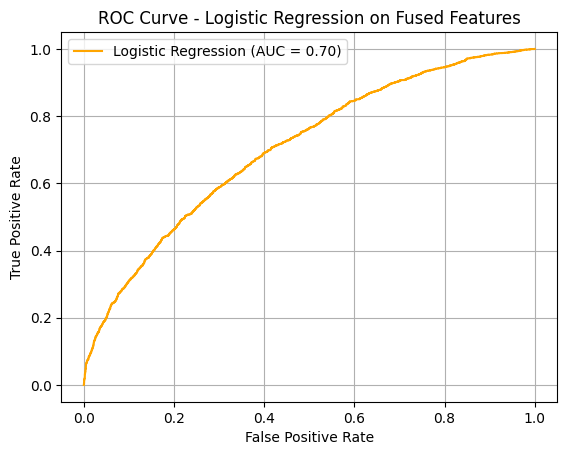

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ✅ Train LR on fused features
LR_model = LogisticRegression(
    C=1, solver='liblinear', class_weight='balanced', max_iter=10000
)
LR_model.fit(X_train_combined, train_data['label'])

# Decision scores for ROC
LR_scores = LR_model.decision_function(X_train_combined)

# ROC computation
lr_fpr, lr_tpr, _ = roc_curve(train_data['label'], LR_scores)
lr_roc_auc = auc(lr_fpr, lr_tpr)

# Plot ROC Curve
plt.plot(lr_fpr, lr_tpr, label=f"Logistic Regression (AUC = {lr_roc_auc:.2f})", color='orange')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression on Fused Features")
plt.legend()
plt.grid()
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt



#Best SVM Params: {'C': 0.001, 'class_weight': 'balanced', 'loss': 'hinge'}
#  Reinitialize SVM for fused features with probability=True if not already done
SVM_model = SVC(
    C=1,
    kernel='linear',
    class_weight='balanced',
    #probability=True,
    random_state=42
)

#  Fit on fused training features
SVM_model.fit(X_train_combined, train_data['label'])

#  Fit on fused training features
#SVM_model.fit(X_train_combined, train_data['label'])

#  Predict + get decision scores for ROC-AUC
SVM_predictions = SVM_model.predict(X_train_combined)
SVM_scores = SVM_model.decision_function(X_train_combined)

#  Compute ROC curve + AUC
svm_fpr, svm_tpr, _ = roc_curve(train_data['label'], SVM_scores)
svm_roc_auc = auc(svm_fpr, svm_tpr)

#  Print results
print(f"Accuracy for SVM is {accuracy_score(train_data['label'], SVM_predictions):.4f}")
print(f"SVM ROC_AUC is {svm_roc_auc:.4f}")




Accuracy for SVM is 0.6503
SVM ROC_AUC is 0.7046


## SVM with image features

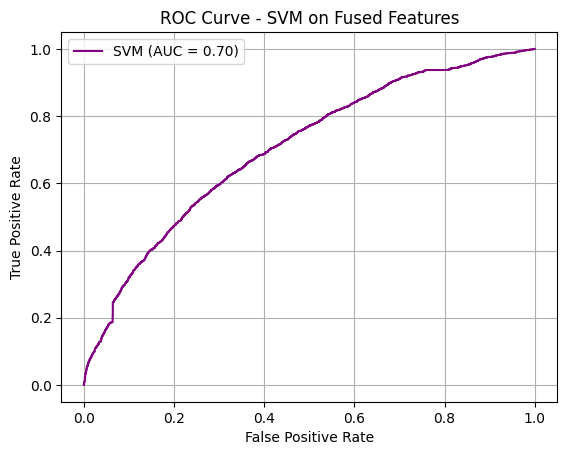

In [ ]:
# Plot ROC Curve
plt.plot(svm_fpr, svm_tpr, label=f"SVM (AUC = {svm_roc_auc:.2f})", color='purple')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM on Fused Features")
plt.legend()
plt.grid()
plt.show()

## RF with the image features fused

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

#  Reinitialize RF for fused features
RF_model = RandomForestClassifier(
    n_estimators=150,
    max_depth=9,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)


#  Fit on fused features
RF_model.fit(X_train_combined, train_data['label'])

#  Predict + probability scores for ROC-AUC
RF_predictions = RF_model.predict(X_train_combined)
RF_probs = RF_model.predict_proba(X_train_combined)[:, 1]  # Get prob for class 1

#  ROC Curve + AUC
rf_fpr, rf_tpr, _ = roc_curve(train_data['label'], RF_probs)
rf_roc_auc = auc(rf_fpr, rf_tpr)

#  Print results
print(f"Accuracy for RF is {accuracy_score(train_data['label'], RF_predictions):.4f}")
print(f"RF ROC_AUC is {rf_roc_auc:.4f}")



Accuracy for RF is 0.9344
RF ROC_AUC is 0.9797


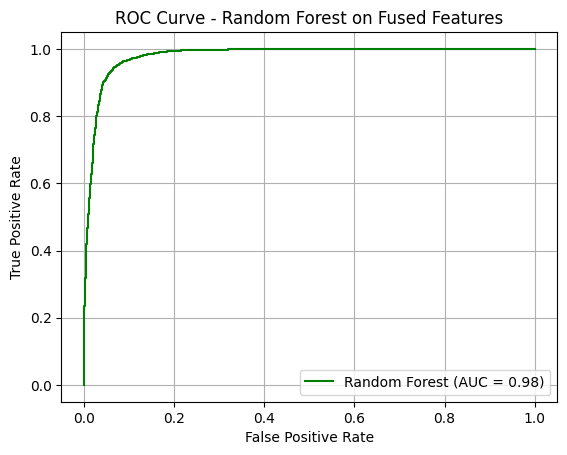

In [ ]:
#  Plot ROC
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_roc_auc:.2f})", color='green')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest on Fused Features")
plt.legend()
plt.grid()
plt.show()

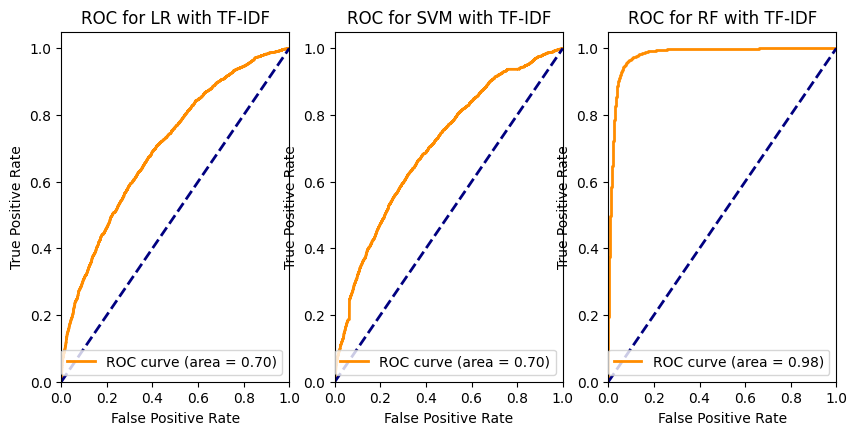

In [ ]:
from sklearn.metrics import auc
lw = 2
fig=plt.figure(figsize=(10,10))

ax1=fig.add_subplot(231)
ax1.plot(lr_fpr, lr_tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % lr_roc_auc)
ax1.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for LR with TF-IDF')
plt.legend(loc="lower right")


ax2=fig.add_subplot(232)
ax2.plot(svm_fpr, svm_tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % svm_roc_auc)
ax2.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for SVM with TF-IDF')
plt.legend(loc="lower right")


ax3=fig.add_subplot(233)
ax3.plot(rf_fpr, rf_tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % rf_roc_auc)
ax3.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for RF with TF-IDF')
plt.legend(loc="lower right")




## Compute recall, F1 and precision with fused features

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

best_model = grid_svm.best_estimator_
preds = best_model.predict(X_train_combined)

models = {
    'Logistic Regression': LR_model,
    'Random Forest': RF_model
}

for name, model in models.items():
    print(f"\n Evaluating {name} with combined features ")

    preds = model.predict(X_train_combined)  # Or X_test_counts_tf if you're evaluating test data

    precision = precision_score(train_data['label'], preds, average='binary')  # change to 'macro' or 'weighted' if multiclass
    recall = recall_score(train_data['label'], preds, average='binary')
    f1 = f1_score(train_data['label'], preds, average='binary')

    print(f" Precision: {precision:.4f}")
    print(f" Recall:    {recall:.4f}")
    print(f" F1 Score:  {f1:.4f}")

    print("📊 Full Classification Report:")
    print(classification_report(train_data['label'], preds))



📌 Evaluating Logistic Regression with combined features 
🔹 Precision: 0.5517
🔹 Recall:    0.6312
🔹 F1 Score:  0.5887
📊 Full Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.65      0.69      4183
           1       0.55      0.63      0.59      2817

    accuracy                           0.65      7000
   macro avg       0.64      0.64      0.64      7000
weighted avg       0.66      0.65      0.65      7000


📌 Evaluating Random Forest with combined features 
🔹 Precision: 0.6577
🔹 Recall:    0.6567
🔹 F1 Score:  0.6572
📊 Full Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      4183
           1       0.66      0.66      0.66      2817

    accuracy                           0.72      7000
   macro avg       0.71      0.71      0.71      7000
weighted avg       0.72      0.72      0.72      7000



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# If you've already run:
# SVM_predictions = SVM_model.predict(X_train_combined)

precision = precision_score(train_data['label'], SVM_predictions)
recall = recall_score(train_data['label'], SVM_predictions)
f1 = f1_score(train_data['label'], SVM_predictions)

print(f"🔹 Precision (train): {precision:.4f}")
print(f"🔹 Recall (train):    {recall:.4f}")
print(f"🔹 F1 Score (train):  {f1:.4f}")

# Optional: Full breakdown
print("\n📊 Classification Report on Train:")
print(classification_report(train_data['label'], SVM_predictions))


🔹 Precision (train): 0.5543
🔹 Recall (train):    0.6415
🔹 F1 Score (train):  0.5947

📊 Classification Report on Train:
              precision    recall  f1-score   support

           0       0.73      0.65      0.69      4183
           1       0.55      0.64      0.59      2817

    accuracy                           0.65      7000
   macro avg       0.64      0.65      0.64      7000
weighted avg       0.66      0.65      0.65      7000



In [ ]:
#define a funcation that could draw confusion matrix
def plot_confusion_matrix(cm, labels_name, title):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    num_local = np.array(range(len(labels_name)))
    plt.xticks(num_local, labels_name, rotation=90)
    plt.yticks(num_local, labels_name)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

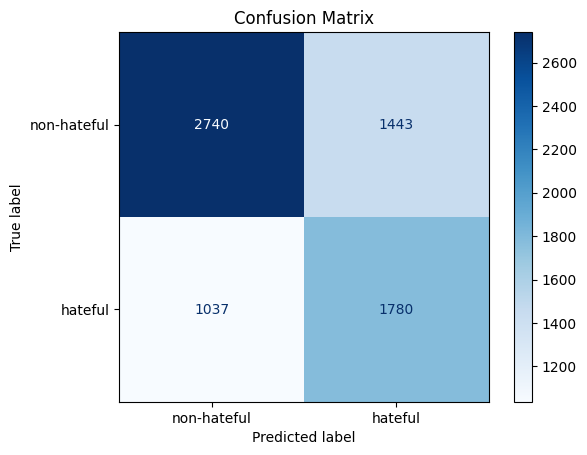

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#  Predictions
lr_predictions = LR_model.predict(X_train_combined)  # or X_train_counts_tf if on train data

# True labels
y_true = train_data['label']  # or train_data['label'] if you're using train set

#  Confusion matrix
LR_matrix = confusion_matrix(y_true, lr_predictions)

#  Plot
disp = ConfusionMatrixDisplay(confusion_matrix=LR_matrix, display_labels=['non-hateful','hateful'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


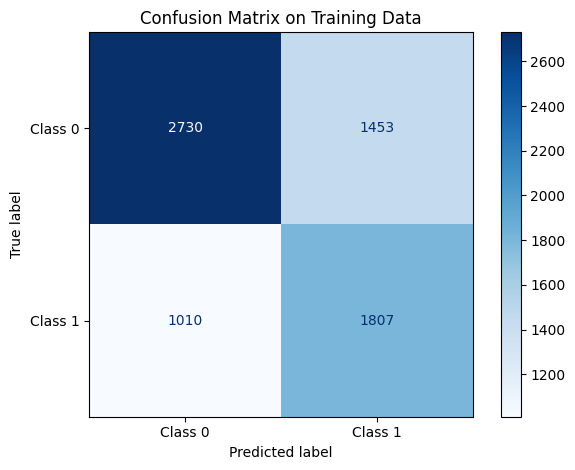

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(train_data['label'], SVM_predictions)

# Display the matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix on Training Data")
plt.tight_layout()
plt.show()


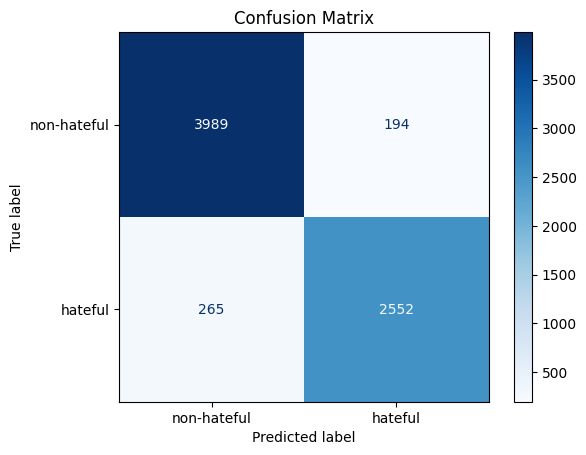

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#  Predictions
rf_predictions = RF_model.predict(X_train_combined)  # or X_train_counts_tf if on train data

#  True labels
y_rf_true = train_data['label']  # or train_data['label'] if you're using train set

#  Confusion matrix
RF_matrix = confusion_matrix(y_rf_true, rf_predictions)

#  Plot
disp = ConfusionMatrixDisplay(confusion_matrix=RF_matrix, display_labels=['non-hateful','hateful'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


### Predict on Fused Test Features on val data

In [ ]:
# Logistic Regression
lr_val_preds = LR_model.predict(X_val_combined)

# SVM
svm_val_preds = SVM_model.predict(X_val_combined)

# Random Forest
rf_val_preds = RF_model.predict(X_val_combined)


##  Compute Metrics on fused val data

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print(" LR on Validation Set:")
print(classification_report(val_data['label'], lr_val_preds))
print("Accuracy:", accuracy_score(val_data['label'], lr_val_preds))

print("\n SVM on Validation Set:")
print(classification_report(val_data['label'], svm_val_preds))
print("Accuracy:", accuracy_score(val_data['label'], svm_val_preds))

print("\n Random Forest on Validation Set:")
print(classification_report(val_data['label'], rf_val_preds))
print("Accuracy:", accuracy_score(val_data['label'], rf_val_preds))


📊 LR on Validation Set:
              precision    recall  f1-score   support

           0       0.44      0.66      0.53       637
           1       0.60      0.38      0.46       863

    accuracy                           0.50      1500
   macro avg       0.52      0.52      0.49      1500
weighted avg       0.53      0.50      0.49      1500

Accuracy: 0.49533333333333335

📊 SVM on Validation Set:
              precision    recall  f1-score   support

           0       0.44      0.65      0.52       637
           1       0.60      0.39      0.47       863

    accuracy                           0.50      1500
   macro avg       0.52      0.52      0.50      1500
weighted avg       0.53      0.50      0.49      1500

Accuracy: 0.498

📊 Random Forest on Validation Set:
              precision    recall  f1-score   support

           0       0.44      0.70      0.54       637
           1       0.61      0.34      0.44       863

    accuracy                           0.49      1

## Compute precision, F1 and recall on val data

📌 Precision: 0.5977859778597786
📌 Recall:    0.37543453070683663
📌 F1 Score:  0.46120996441281137

📊 Classification Report using combined features:
              precision    recall  f1-score   support

           0       0.44      0.66      0.53       637
           1       0.60      0.38      0.46       863

    accuracy                           0.50      1500
   macro avg       0.52      0.52      0.49      1500
weighted avg       0.53      0.50      0.49      1500

📌 Confusion Matrix :
[[419 218]
 [539 324]]
📈 ROC AUC: 0.5296


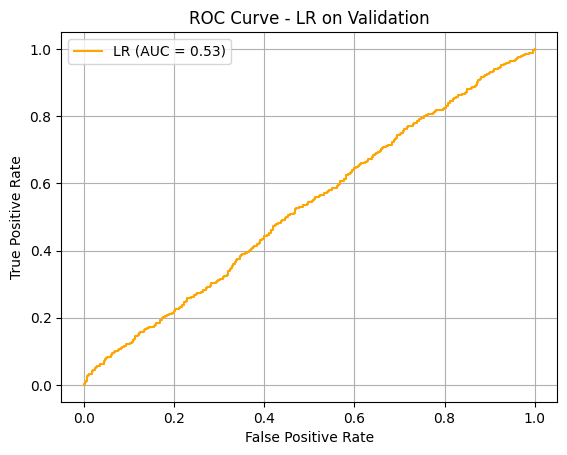

In [ ]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc
)
import matplotlib.pyplot as plt

# Example: Logistic Regression on fused validation features
lr_val_preds = LR_model.predict(X_val_combined)
lr_scores = LR_model.decision_function(X_val_combined)  # or predict_proba if available

#  Basic Metrics
print(" Precision:", precision_score(val_data['label'], lr_val_preds, average='binary'))
print(" Recall:   ", recall_score(val_data['label'], lr_val_preds, average='binary'))
print(" F1 Score: ", f1_score(val_data['label'], lr_val_preds, average='binary'))

#  Full Report
print("\n📊 Classification Report using combined features:")
print(classification_report(val_data['label'], lr_val_preds))

#  Confusion Matrix
print(" Confusion Matrix :")
print(confusion_matrix(val_data['label'], lr_val_preds))

#  ROC Curve
fpr, tpr, _ = roc_curve(val_data['label'], lr_scores)
roc_auc = auc(fpr, tpr)
print(f" ROC AUC: {roc_auc:.4f}")

#  Plot ROC
plt.plot(fpr, tpr, label=f"LR (AUC = {roc_auc:.2f})", color='orange')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - LR on Validation")
plt.legend()
plt.grid()
plt.show()


📌 Precision: 0.5985663082437276
📌 Recall:    0.3870220162224797
📌 F1 Score:  0.47009148486981

📊 Classification Report using combined features (SVM):
              precision    recall  f1-score   support

           0       0.44      0.65      0.52       637
           1       0.60      0.39      0.47       863

    accuracy                           0.50      1500
   macro avg       0.52      0.52      0.50      1500
weighted avg       0.53      0.50      0.49      1500

📌 Confusion Matrix (SVM):
[[413 224]
 [529 334]]
📈 ROC AUC: 0.5308


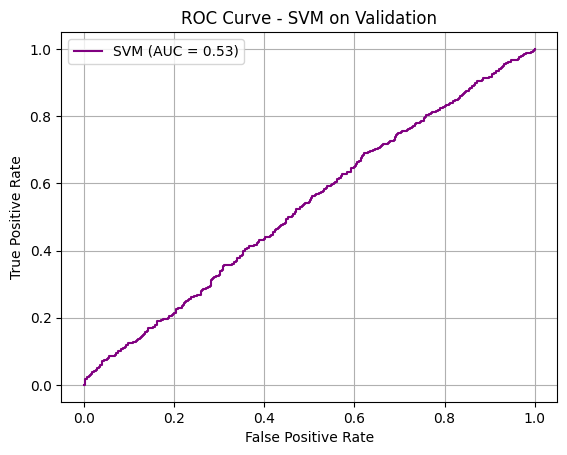

In [ ]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc
)
import matplotlib.pyplot as plt

#  Predict using SVM on validation set
svm_val_preds = SVM_model.predict(X_val_combined)

#  Get decision scores for ROC
svm_scores = SVM_model.decision_function(X_val_combined)

#  Basic Metrics
print(" Precision:", precision_score(val_data['label'], svm_val_preds, average='binary'))
print(" Recall:   ", recall_score(val_data['label'], svm_val_preds, average='binary'))
print(" F1 Score: ", f1_score(val_data['label'], svm_val_preds, average='binary'))

#  Full Report
print("\n Classification Report using combined features (SVM):")
print(classification_report(val_data['label'], svm_val_preds))

#  Confusion Matrix
print(" Confusion Matrix (SVM):")
print(confusion_matrix(val_data['label'], svm_val_preds))

#  ROC Curve
fpr, tpr, _ = roc_curve(val_data['label'], svm_scores)
roc_auc = auc(fpr, tpr)
print(f"📈 ROC AUC: {roc_auc:.4f}")

# Plot ROC
plt.plot(fpr, tpr, label=f"SVM (AUC = {roc_auc:.2f})", color='purple')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM on Validation")
plt.legend()
plt.grid()
plt.show()


📌 Precision: 0.6066252587991718
📌 Recall:    0.33951332560834296
📌 F1 Score:  0.43536404160475484

📊 Classification Report using combined features (RF):
              precision    recall  f1-score   support

           0       0.44      0.70      0.54       637
           1       0.61      0.34      0.44       863

    accuracy                           0.49      1500
   macro avg       0.52      0.52      0.49      1500
weighted avg       0.54      0.49      0.48      1500

📌 Confusion Matrix (RF):
[[447 190]
 [570 293]]
📈 ROC AUC: 0.5257


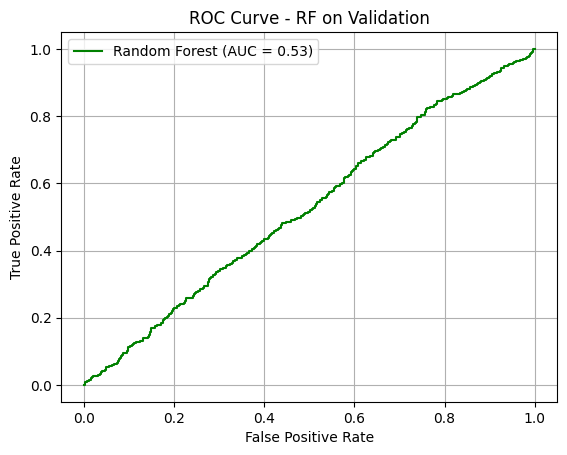

In [ ]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc
)
import matplotlib.pyplot as plt

#  Predict using RF on validation set
rf_val_preds = RF_model.predict(X_val_combined)

# Get probability scores for ROC-AUC
rf_scores = RF_model.predict_proba(X_val_combined)[:, 1]  # Probability for class 1

#  Basic Metrics
print("Precision:", precision_score(val_data['label'], rf_val_preds, average='binary'))
print("Recall:   ", recall_score(val_data['label'], rf_val_preds, average='binary'))
print("F1 Score: ", f1_score(val_data['label'], rf_val_preds, average='binary'))

# 📊 Full Report
print("\n📊 Classification Report using combined features (RF):")
print(classification_report(val_data['label'], rf_val_preds))

#  Confusion Matrix
print(" Confusion Matrix (RF):")
print(confusion_matrix(val_data['label'], rf_val_preds))

#  ROC Curve
fpr, tpr, _ = roc_curve(val_data['label'], rf_scores)
roc_auc = auc(fpr, tpr)
print(f"📈 ROC AUC: {roc_auc:.4f}")

#  Plot ROC
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})", color='green')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - RF on Validation")
plt.legend()
plt.grid()
plt.show()


In [ ]:
X_test_combined = np.hstack([
    alpha * X_text_test_pca,
    (1 - alpha) * test_image_pca
])


## Predict labels on test data

Soft Voting (Confidence-Weighted 🔍)
Use prediction probabilities instead of hard labels. Models with higher confidence contribute more.

In [ ]:
lr_test_probs = LR_model.predict_proba(X_test_combined)[:, 1]

In [ ]:
test_data.columns

Index(['id', 'image_url', 'ocr', 'cleaned_ocr'], dtype='object')

In [ ]:
# Predictions
svm_test_preds = best_svm.predict(X_test_combined)

# Scores from decision_function for ROC-AUC
svm_test_scores = best_svm.decision_function(X_test_combined)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize scores to [0, 1] — treat as pseudo-probabilities
scaler = MinMaxScaler()
svm_test_probs = scaler.fit_transform(svm_test_scores.reshape(-1, 1)).flatten()


In [ ]:
rf_test_probs = RF_model.predict_proba(X_test_combined)[:, 1]

In [ ]:
avg_probs = (lr_test_probs + svm_test_probs + rf_test_probs) / 3
final_labels = (avg_probs >= 0.5).astype(int)


## Generating labels based on ensemble technque and saving in csv

In [ ]:
import pandas as pd

# Step 1: Create DataFrame with raw test info
results_df = test_data.copy()

# Step 2: Add your final ensemble labels
results_df['ensemble_prediction'] = final_labels

# Step 3: (Optional) Add model confidence
results_df['confidence'] = avg_probs

# Step 4: Save to CSV
results_df.to_csv("Hate_speech_label_predictions_using_ML_0.5.csv", index=False)
